#### Import standard libraries for numerics and plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Import the package MultiNetX

In [2]:
import multinetx as mx

#### Create three Erd"os- R'enyi networks with N nodes for each layer

In [3]:
N = 8
g1 = mx.generators.erdos_renyi_graph(N,0.9,seed=218)
g2 = mx.generators.erdos_renyi_graph(N,0.9,seed=211)
g3 = mx.generators.erdos_renyi_graph(N,0.9,seed=208)

#### Create an 3Nx3N lil sparse matrix. It will be used to describe the layers interconnection

In [4]:
adj_block = mx.lil_matrix(np.zeros((N*3,N*3)))

#### Define the type of interconnection among the layers (here we use identity matrices thus connecting one-to-one the nodes among layers)

In [5]:
adj_block[0:  N,  N:2*N] = np.identity(N)    # L_12
adj_block[0:  N,2*N:3*N] = np.identity(N)    # L_13
adj_block[N:2*N,2*N:3*N] = np.identity(N)    # L_23

# use symmetric inter-adjacency matrix
adj_block += adj_block.T

#### Create an instance of the MultilayerGraph class

In [6]:
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

#### Weights can be added to the edges

In [7]:
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=3)

#### Take some information for the multiplex network

In [8]:
print 'MultiNetX name:\n', mg.name ,'\n', mg.info(),'\n'

MultiNetX name:
multilayer_gnp_random_graph(8,0.9)_gnp_random_graph(8,0.9)_gnp_random_graph(8,0.9) 
3-layer graph, intra_layer_edges:76, inter_layer_edges:24, number_of_nodes_in_layer:8  



In [9]:
print 'MultilayerGraph edges:',\
        '\n\n intra-layer edges: ',mg.get_intra_layer_edges(),\
        '\n\n inter-layer edges: ',mg.get_inter_layer_edges(),'\n' 

MultilayerGraph edges: 

 intra-layer edges:  [(0, 1), (0, 2), (0, 4), (0, 5), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 7), (6, 7), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (11, 15), (12, 14), (12, 15), (13, 15), (14, 15), (16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (16, 22), (16, 23), (17, 18), (17, 19), (17, 21), (17, 22), (17, 23), (18, 20), (18, 21), (18, 22), (18, 23), (19, 20), (19, 21), (19, 22), (19, 23), (20, 21), (20, 22), (20, 23), (21, 22), (21, 23), (22, 23)] 

 inter-layer edges:  [(8, 0), (9, 1), (10, 2), (11, 3), (12, 4), (13, 5), (14, 6), (15, 7), (16, 0), (16, 8), (17, 1), (17, 9), (18, 2), (18, 10), (19, 3), (19, 11), (20, 4), (20, 12), (21, 5), (21, 13), (22, 6), (22, 14), (23, 7), (23, 15)] 



In [10]:
print 'intralayer edges of 1: ',mg.get_intra_layer_edges_of_layer(layer=0)
print 'intralayer edges of 2: ',mg.get_intra_layer_edges_of_layer(layer=1)
print 'intralayer edges of 3: ',mg.get_intra_layer_edges_of_layer(layer=2)

intralayer edges of 1:  [(0, 1), (0, 2), (0, 4), (0, 5), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 7), (6, 7)]
intralayer edges of 2:  [(8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (11, 15), (12, 14), (12, 15), (13, 15), (14, 15)]
intralayer edges of 3:  [(16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (16, 22), (16, 23), (17, 18), (17, 19), (17, 21), (17, 22), (17, 23), (18, 20), (18, 21), (18, 22), (18, 23), (19, 20), (19, 21), (19, 22), (19, 23), (20, 21), (20, 22), (20, 23), (21, 22), (21, 23), (22, 23)]


#### A layer can be chosen: it is a networkx.Graph so it inherits all of its properties.

In [11]:
layer = 1
mg1 = mg.get_layer(layer-1)
print 'layer', layer, ' name is', mg1.name

layer 1  name is gnp_random_graph(8,0.9)


In [12]:
print 'Adjacency matrix:\n', \
        mx.adjacency_matrix(mg,weight=None).todense(),'\n'
print 'Adjacency matrix (weighted):\n', \
        mx.adjacency_matrix(mg,weight="weight").todense(),'\n'

Adjacency matrix:
[[0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1]
 [0 0 0 1 0 0

In [13]:
%matplotlib inline

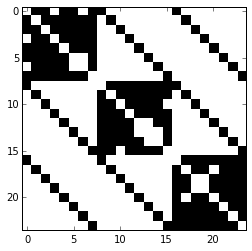

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mx.adjacency_matrix(mg,weight=None).todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.binary);

In [15]:
print 'Laplacian matrix:\n',\
        mx.laplacian_matrix(mg,weight=None).todense(),'\n'
print 'Laplacian matrix (weighted):\n', \
        mx.laplacian_matrix(mg,weight="weight").todense(),'\n'

Laplacian matrix:
[[ 7 -1 -1  0 -1 -1  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0]
 [-1  9 -1 -1 -1 -1 -1 -1  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0]
 [-1 -1  9 -1 -1 -1 -1 -1  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0]
 [ 0 -1 -1  8 -1 -1 -1 -1  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0]
 [-1 -1 -1 -1  9 -1 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [-1 -1 -1 -1 -1  8  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0]
 [ 0 -1 -1 -1 -1  0  7 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0]
 [-1 -1 -1 -1 -1 -1 -1  9  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1]
 [-1  0  0  0  0  0  0  0  9 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0 -1  9 -1 -1 -1 -1 -1 -1  0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0 -1 -1  8 -1 -1 -1 -1  0  0  0 -1  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0 -1 -1 -1  9 -1 -1 -1 -1  0  0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0 -1 -1 -1 -1  8  0 -1 -1  0  0  0  0 -1  0  0  0]
 [ 0  0

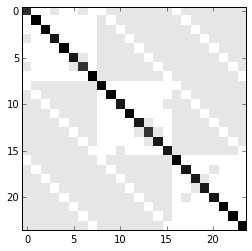

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mx.laplacian_matrix(mg,weight=None).todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.binary);

In [17]:
print 'Laplacian spectrum:\n', \
        mx.laplacian_spectrum(mg,weight="weight"),'\n'

Laplacian spectrum:
[ -7.28023397e-16   9.00000000e+00   9.00000000e+00   1.15820412e+01
   1.30000000e+01   1.36118630e+01   1.40468718e+01   1.48269378e+01
   1.53667455e+01   1.58555302e+01   1.99399232e+01   2.15325431e+01
   2.21475930e+01   2.25804624e+01   2.32964508e+01   2.36688531e+01
   2.41420291e+01   2.44021557e+01   2.50000000e+01   2.50000000e+01
   2.50000000e+01   2.50000000e+01   2.50000000e+01   2.50000000e+01] 

